# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [13]:
# student 1:Noa 3427
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [44]:
def load_data():
    train_df = pd.read_csv('cancer_train.csv') #טעינת נתונים מהקובץ
    test_df = pd.read_csv('cancer_test.csv')

#הצגת 5 שורות ראשונות
    print(train_df.head())
    print(test_df.head())

    return train_df,test_df


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

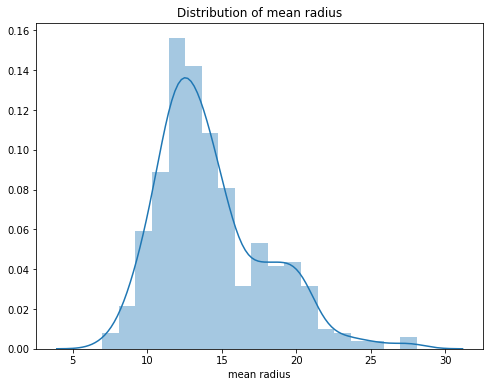

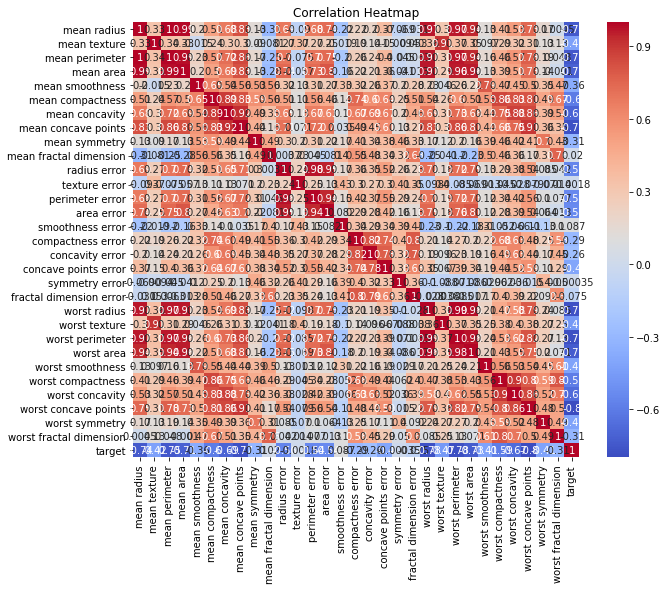

In [45]:
train_df,test_df=load_data()
#הצגת סטטיסטיקות וויזואליזציות על הנתונים
print(train_df.describe())

# ויזואליזציה ראשונה: היסטוגרמה 
plt.figure(figsize=(8, 6))
sns.distplot(train_df['mean radius'], kde=True)
plt.title('Distribution of mean radius')
plt.show()

# ויזואליזציה שנייה: heatmap של הקורלציות
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [54]:
train_X = train_df.drop('target', axis=1)
train_y = train_df['target']
test_X = test_df.drop('target', axis=1)
test_y = test_df['target']
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Cross-validation with grid search
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(train_X, train_y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best F1 Macro Score: 0.9628067820545279


In [55]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [56]:
# SVC grid search
svc_grid = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
svc_model = SVC()
svc_search = GridSearchCV(svc_model, svc_grid, cv=5, scoring='f1_macro')
svc_search.fit(train_X, train_y)

C:\Users\97252\OneDrive\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\97252\OneDrive\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\97252\OneDrive\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\97252\OneDrive\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is i

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [52]:
# Retrain the model on the entire training set
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(train_X_scaled, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Part 5 - Apply on test and show model performance estimation

In [53]:
# Predict on the test set
predictions = best_model.predict(test_X_scaled)

# Show first 5 predictions
print(predictions[:5])

# Evaluate the model
from sklearn.metrics import f1_score
test_f1 = f1_score(test_y, predictions, average='macro')
print("Test F1 Score:", test_f1)

[1 1 0 1 1]
Test F1 Score: 0.9587703435804702
